In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
profiles = pd.read_csv("data/fully-unified-data/profiles/officer-profiles.csv", low_memory=False)
profiles.head()

,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2863.0
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,6100.0
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,14560.0
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,15445.0
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NaN,123.0,POLICE OFFICER,NaN,NaN,3,POLICE OFFICER,18373.0


Star range: [1.0, 60090.0]


array([[<AxesSubplot:title={'center':'current_star'}>]], dtype=object)

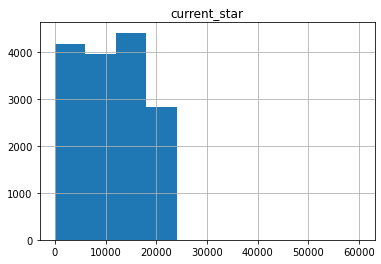

In [41]:
print(f"Star range: [{profiles['current_star'].min()}, {profiles['current_star'].max()}]")
profiles.hist('current_star')

In [37]:
# top offender
profiles[profiles['link_UID'] == 8562]

,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
12943,112944,JEROME,FINNIGAN,A,NaN,NaN,1963.0,WHITE,MALE,1988-12-05,2008-08-05,0.0,5167.0,153.0,POLICE OFFICER,1988-12-05,1988-12-05,10,POLICE OFFICER,8562.0


In [6]:
profiles['cleaned_rank'].value_counts()

POLICE OFFICER                     22966
SERGEANT                            3495
DETECTIVE                           3067
LIEUTENANT                           960
FIELD TRAINING OFFICER               341
CAPTAIN                              327
COMMANDER                            136
DEPUTY CHIEF                          61
CHIEF                                 29
ASSISTANT DEPUTY SUPERINTENDENT       25
OTHER                                 24
DEPUTY SUPERINTENDENT                 23
FIRST DEPUTY SUPERINTENDENT            8
SUPERINTENDENT OF POLICE               6
SUPERINTENDENT'S CHIEF OF STAFF        3
DIRECTOR OF CAPS                       1
ASSISTANT SUPERINTENDENT               1
Name: cleaned_rank, dtype: int64

In [7]:
profiles['race'].value_counts()

WHITE                             20667
BLACK                              7630
HISPANIC                           4579
ASIAN/PACIFIC ISLANDER              539
NATIVE AMERICAN/ALASKAN NATIVE       66
Name: race, dtype: int64

In [8]:
roster = pd.read_csv("data/fully-unified-data/roster/roster__2018-03.csv", low_memory=False)
roster.head()

,row_id,gender,race,current_age,is_sworn_officer,appointed_date,rank_no,unit_id,unit,unit_detail,...,first_name,first_name_NS,last_name,last_name_NS,middle_initial,middle_initial2,suffix_name,roster__2018-03_ID,UID,link_UID
0,1,MALE,HISPANIC,52.0,Y,1994-10-03,9161,6.0,1.0,NaN,...,ARTEMIO,ARTEMIO,PENA,PENA,NaN,NaN,NaN,1,101771.0,22174.0
1,2,MALE,WHITE,60.0,Y,1995-12-04,9161,6.0,1.0,NaN,...,JAMES,JAMES,MC HUGH,MCHUGH,P,NaN,NaN,2,111894.0,18280.0
2,3,MALE,WHITE,47.0,Y,1992-01-02,9161,23.0,1.0,18.0,...,MICHAEL,MICHAEL,DAHILL,DAHILL,J,NaN,NaN,3,120251.0,6073.0
3,4,MALE,BLACK,49.0,Y,1996-07-08,9161,6.0,1.0,NaN,...,JAMES,JAMES,JEFFRIES,JEFFRIES,F,NaN,NaN,4,111699.0,13376.0
4,5,MALE,WHITE,56.0,Y,1991-06-19,9171,6.0,1.0,NaN,...,JOHN,JOHN,OWEN,OWEN,W,NaN,NaN,5,114403.0,21539.0


In [37]:
sal = pd.read_csv("data/fully-unified-data/salary/salary-ranks_2002-2017_2017-09.csv")
sal.head()

,UID,pay_grade,rank,salary,year,spp_date,cleaned_rank,link_UID
0,100011.0,E|3,SERGEANT,101442.0,2016.0,2016-02-01,SERGEANT,3978.0
1,100013.0,E|3,SERGEANT,111474.0,2016.0,2016-06-01,SERGEANT,4443.0
2,100014.0,D|2A,POLICE OFFICER (ASSIGNED AS DETECTIVE),76446.0,2007.0,2007-04-01,DETECTIVE,4879.0
3,100027.0,E|3,SERGEANT,98184.0,2016.0,2016-06-01,SERGEANT,16115.0
4,100044.0,D|2,POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN),61518.0,2004.0,2004-12-01,POLICE OFFICER,38.0


In [38]:
sal[sal['link_UID'] == 3978]

,UID,pay_grade,rank,salary,year,spp_date,cleaned_rank,link_UID
0,100011.0,E|3,SERGEANT,101442.0,2016.0,2016-02-01,SERGEANT,3978.0
3288,100011.0,D|1,POLICE OFFICER,36984.0,2004.0,2004-11-29,POLICE OFFICER,3978.0
3289,100011.0,D|1,POLICE OFFICER,52788.0,2005.0,2004-11-29,POLICE OFFICER,3978.0
3290,100011.0,D|1,POLICE OFFICER,57744.0,2006.0,2004-11-29,POLICE OFFICER,3978.0
3291,100011.0,D|1,POLICE OFFICER,61932.0,2007.0,2004-11-29,POLICE OFFICER,3978.0
3292,100011.0,D|1,POLICE OFFICER,64992.0,2008.0,2004-11-29,POLICE OFFICER,3978.0
3293,100011.0,D|1,POLICE OFFICER,68262.0,2009.0,2004-11-29,POLICE OFFICER,3978.0
3294,100011.0,D|1,POLICE OFFICER,73164.0,2010.0,2004-11-29,POLICE OFFICER,3978.0
3295,100011.0,D|1,POLICE OFFICER,74628.0,2011.0,2004-11-29,POLICE OFFICER,3978.0
3296,100011.0,D|1,POLICE OFFICER,75372.0,2012.0,2004-11-29,POLICE OFFICER,3978.0


<AxesSubplot:xlabel='year', ylabel='salary'>

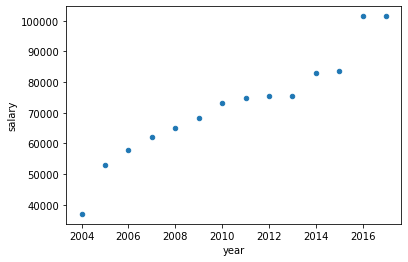

In [31]:
sal[sal['link_UID'] == 3978.0].plot.scatter(x='year', y='salary')

<AxesSubplot:xlabel='year', ylabel='salary'>

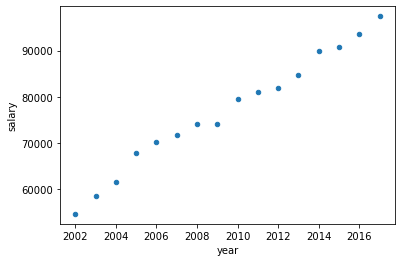

In [34]:
sal[sal['link_UID'] == 38.0].plot.scatter(x='year', y='salary')

<AxesSubplot:xlabel='year', ylabel='salary'>

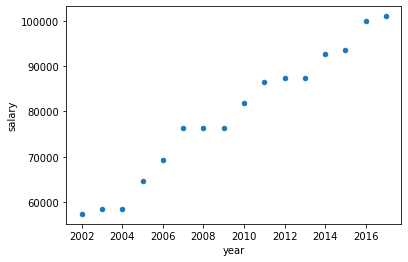

In [32]:
sal[sal['link_UID'] == 4879.0].plot.scatter(x='year', y='salary')

<AxesSubplot:xlabel='year', ylabel='salary'>

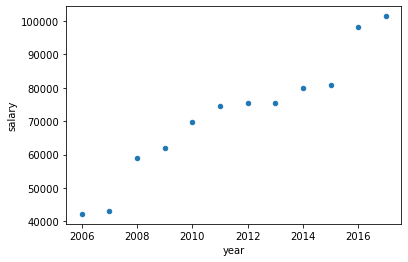

In [33]:
sal[sal['link_UID'] == 16115.0].plot.scatter(x='year', y='salary')

In [4]:
salary = pd.read_csv("data/fully-unified-data/salary/salary_2002-2017_2017-09.csv")
salary.head()

,salary_2002-2017_2017-09_ID,row_id,pay_grade,rank,salary,employee_status,org_hire_date,spp_date,start_date,year,...,salary-2011_2002-2017_2017-09_ID,salary-2012_2002-2017_2017-09_ID,salary-2013_2002-2017_2017-09_ID,salary-2014_2002-2017_2017-09_ID,salary-2015_2002-2017_2017-09_ID,salary-2016_2002-2017_2017-09_ID,salary-2017_2002-2017_2017-09_ID,salary_2002-2017_2017-09_ID.1,UID,link_UID
0,1,1490,D|2A,POLICE OFFICER (ASSIGNED AS DETECTIVE),64356.0,CAREER SERVICE,1990-08-27,NaN,1990-08-27,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100013,4443.0
1,2,6444,D|1,POLICE OFFICER,57426.0,CAREER SERVICE,1996-12-02,1996-12-02,1996-12-02,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,100014,4879.0
2,3,10542,D|1,POLICE OFFICER,61512.0,CAREER SERVICE,1986-09-11,1986-11-17,1986-11-17,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,100015,5520.0
3,4,11235,D|1,POLICE OFFICER,54672.0,CAREER SERVICE,1998-06-29,1998-06-29,1998-06-29,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,100016,5913.0
4,5,2884,D|1,POLICE OFFICER,52092.0,CAREER SERVICE,2000-02-28,2000-02-28,2000-02-28,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,100019,6388.0


Salary range: [36984.0, 260004.0]


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

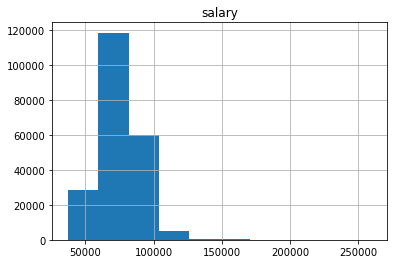

In [117]:
print(f"Salary range: [{salary['salary'].min()}, {salary['salary'].max()}]")
salary.hist('salary')

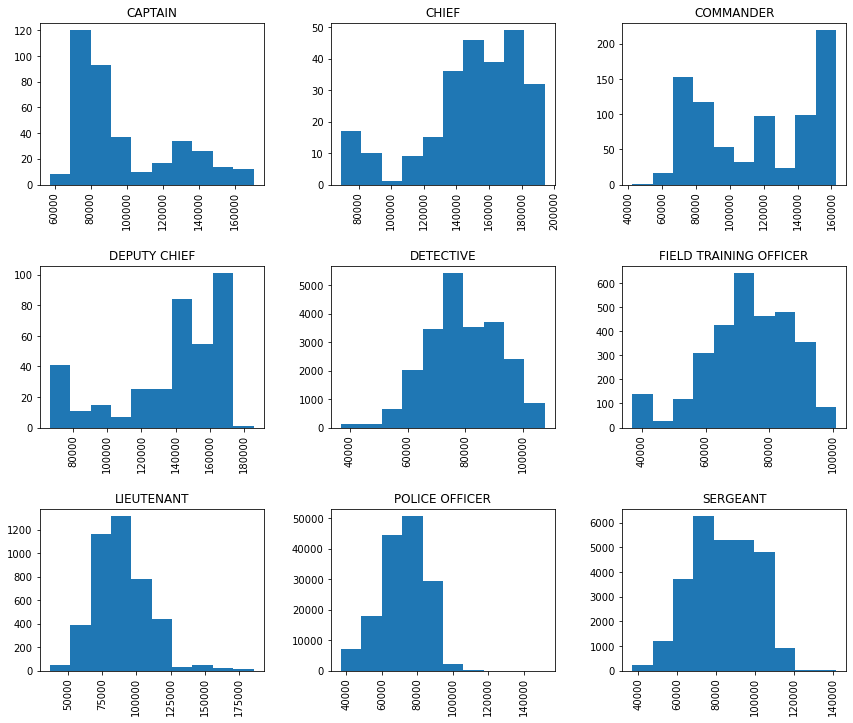

In [123]:
joined_salary = pd.merge(salary, profiles, how='left', left_on=['link_UID', 'UID'], right_on=['link_UID', 'UID'])
joined_salary['cleaned_rank'].value_counts()

interested = [
    'POLICE OFFICER',
    'SERGEANT',
    'DETECTIVE',
    'LIEUTENANT',
    'FIELD TRAINING OFFICER',
    'COMMANDER',
    'CAPTAIN',
    'DEPUTY CHIEF',
    'CHIEF',
]
joined_salary[joined_salary.cleaned_rank.isin(interested)].hist('salary', by='cleaned_rank', figsize=(14,12))
plt.show()

In [11]:
salary['employee_status'].value_counts()

CAREER SERVICE                 199568
PROBATIONARY CAREER SERVICE     11390
SENIOR EXECUTIVE SERVICE         1302
EXEMPT BY ORDINANCE               161
EXEMPT CONFIDENTIAL                87
Name: employee_status, dtype: int64

In [12]:
settlements = pd.read_csv("data/fully-unified-data/settlements/settlements_1952-2016_2017-01.csv")
settlements.head()

,row_id,settlements_1952-2016_2017-01_ID,case_id,officer_id,complaint,incident_date,location,plantiff,settlement,service_length,UID
0,1,1,14-CV-4800,24165.0,False arrest,2016-06-22,Not specified,Jonathan Guzman,"$35,000","18 years, 6 months (active)",128103.0
1,2,1,14-CV-7969,24165.0,Excessive force/minor,2014-04-03,Not specified,Edward Resendiz,"$15,000","18 years, 6 months (active)",128103.0
2,3,1,15-CV-111,24165.0,False arrest,2013-11-08,6000 W. 56th St.,Lashaun Duprey,"$30,000","18 years, 6 months (active)",128103.0
3,4,1,13-CV-1477,24165.0,Excessive force/serious,2012-02-25,6300 W. 52nd St.,NaN,"$250,001","18 years, 6 months (active)",128103.0
4,5,1,10-CV-2916,24165.0,Excessive force/minor,2010-04-10,7600 S. Loomis Blvd.,Latoine Hull,"$8,273","18 years, 6 months (active)",128103.0


In [13]:
settlements['complaint'].value_counts()

False arrest                       1009
Illegal search/seizure              645
Excessive force/minor               585
Excessive force/serious             411
Excessive force                     172
Other police misconduct             160
Extended detention                  137
Reversed conviction                 102
Failure to provide medical care      74
Malicious prosecution                29
Dui stop                             26
Monell                               14
First amendment violation             3
Attorney fees                         2
Wrongful death                        2
Illinois domestic violence act        2
Conditions of confinement             1
Name: complaint, dtype: int64

In [30]:
complaints = pd.read_csv("data/fully-unified-data/complaints/complaints-complaints.csv", low_memory=False)
complaints.head()
complaints.shape

(181412, 11)

In [29]:
complainants = pd.read_csv("data/fully-unified-data/complaints/complaints-complainants.csv")
complainants.head()
complainants.shape

(121680, 6)

In [34]:
complaints['cr_id'] = complaints['cr_id'].astype(str)
complaints['cv'] = complaints['cv'].astype(str)

complainants['cr_id'] = complainants['cr_id'].astype(str)
complainants['cv'] = complainants['cv'].astype(str)

merged_complaints = pd.merge(complaints, complainants, on=["cr_id"])
merged_complaints.shape
merged_complaints.head()

,cr_id,cv_x,incident_date,complaint_date,closed_date,add1,add2,beat,city,full_address,location,age,birth_year,cv_y,gender,race
0,1000194,2,2006-10-02,2006-10-02,NaN,7809,S SOUTH SHORE DR,0421,CHICAGO IL,NaN,17,NaN,1945.0,3,FEMALE,BLACK
1,1000214,3,2006-10-03,2006-10-04,2010-12-23,7100,South WESTERN AVE,832.0,CHICAGO ILLINOIS 60636,NaN,NaN,NaN,1967.0,3,MALE,BLACK
2,1000214,3,2006-10-03,2006-10-04,2010-12-23,7100,South WESTERN AVE,832.0,CHICAGO ILLINOIS 60636,NaN,NaN,NaN,1967.0,3,MALE,BLACK
3,1002796,3,2006-12-15,2007-01-18,2008-12-15,325,North JEFFERSON ST,1212.0,CHICAGO ILLINOIS 60661,NaN,TAVERN/LIQUOR STORE,NaN,1955.0,3,MALE,WHITE
4,1002796,3,2006-12-15,2007-01-18,2008-12-15,325,North JEFFERSON ST,1212.0,CHICAGO ILLINOIS 60661,NaN,TAVERN/LIQUOR STORE,NaN,1955.0,3,MALE,WHITE


In [22]:
accused = pd.read_csv("data/fully-unified-data/complaints/complaints-accused.csv", low_memory=False)
accused.head()

,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
0,130469.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0
1,103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0
2,111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,17149.0
3,126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,271.0
4,127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,11004.0


In [36]:
accused_2000_2018 = pd.read_csv("data/fully-unified-data/complaints/complaints-accused_2000-2018_2018-03.csv", low_memory=False)
accused_2000_2018.head()

,row_id,complaints-accused_2000-2018_2018-03_ID,cr_id,accusation_id,allegation_category,allegation_category_code,current_investigator_category,current_investigator_category_code,unit,unit_detail,...,penalty_code,number_of_days,final_finding_narrative,star,rank,final_finding_USE,final_outcome_USE,merge,UID,link_UID
0,1,1,259794,262460,EXCESSIVE FORCE / ON DUTY - INJURY,05A,ARRESTEE-DURING ARREST,05ZZA,NaN,3.0,...,NaN,NaN,FINAL- No Penalty,1986.0,SERGEANT OF POLICE,NOT SUSTAINED,NaN,1,107083.0,30115.0
1,2,2,259794,262461,EXCESSIVE FORCE / ON DUTY - INJURY,05A,ARRESTEE-DURING ARREST,05ZZA,NaN,3.0,...,NaN,NaN,FINAL- No Penalty,9331.0,POLICE OFFICER,NOT SUSTAINED,NaN,1,129767.0,2476.0
2,3,3,259797,262464,UNNECESSARY PHYSICAL CONTACT -ON DUTY,05ZZL,UNNECESSARY PHYSICAL CONTACT -ON DUTY,05ZZL,NaN,NaN,...,NaN,NaN,FINAL- No Penalty,NaN,NaN,NOT SUSTAINED,NaN,0,NaN,-999.0
3,4,4,259804,262476,EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - ...,05G,UNNECESSARY DISPLAY OF WEAPON / OFF DUTY,05Q,NaN,153.0,...,SUSPENSION,5.0,INITIAL,14380.0,POLICE OFFICER,SUSTAINED,1 Day Suspension,1,116769.0,17110.0
4,5,4,259804,262476,EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - ...,05G,UNNECESSARY DISPLAY OF WEAPON / OFF DUTY,05Q,NaN,153.0,...,SUSPENSION,5.0,INITIAL,14380.0,POLICE OFFICER,SUSTAINED,1 Day Suspension,1,116769.0,17110.0


In [18]:
awards = pd.read_csv("data/fully-unified-data/awards/awards_1967-2017_2017-08.csv", low_memory=False)
awards.head()

,row_id,awards_1967-2017_2017-08_ID,pps_award_detail_id,award_type,award_start_date,current_award_status,award_request_date,award_end_date,rank,last_promotion_date,requester_full_name,ceremony_date,tracking_no,UID,old_UID,link_UID
0,1,12311.0,8038267,HONORABLE MENTION,2008-07-25,DELETED,2008-07-27,2008-07-25,9171-SERGEANT OF POLICE,NaN,"OCHOA, PETER",NaN,HP-473677,112683.0,1.0,1.0
1,2,12311.0,8046162,ATTENDANCE RECOGNITION AWARD,2005-09-26,DELETED,2008-12-20,2008-09-26,9171-SERGEANT OF POLICE,NaN,"MAZUR, SANDY",NaN,NaN,112683.0,1.0,1.0
2,3,12311.0,8046771,HONORABLE MENTION,2009-01-03,DELETED,2009-01-04,2009-01-03,9171-SERGEANT OF POLICE,NaN,"NIEVES, ROBERTO",NaN,HR103338,112683.0,1.0,1.0
3,4,12311.0,8067659,HONORABLE MENTION,2010-09-21,DELETED,2010-09-27,2010-09-21,9171-SERGEANT OF POLICE,NaN,"TUNSTALL, TRACY",NaN,HS525635,112683.0,1.0,1.0
4,5,12311.0,8074425,HONORABLE MENTION,2011-06-03,DELETED,2011-06-10,2011-06-03,9171-SERGEANT OF POLICE,NaN,"DAVIES, TRACY",NaN,HT329393,112683.0,1.0,1.0


In [21]:
awards['award_type'].value_counts()

HONORABLE MENTION                                         427130
COMPLIMENTARY LETTER                                       72051
DEPARTMENT COMMENDATION                                    49343
ATTENDANCE RECOGNITION AWARD                               29632
EMBLEM OF RECOGNITION - PHYSICAL FITNESS                   24383
2009 CRIME REDUCTION AWARD                                 15278
PRESIDENTIAL ELECTION DEPLOYMENT AWARD 2008                14556
NATO SUMMIT SERVICE AWARD                                  13539
UNIT MERITORIOUS PERFORMANCE AWARD                          9960
LIFE SAVING AWARD                                           6115
SPECIAL COMMENDATION                                        5932
JOINT OPERATIONS AWARD                                      4471
PROBLEM SOLVING AWARD                                       4384
SUPERINTENDENTS AWARD OF VALOR                              3386
DEPLOYMENT OPERATIONS CENTER AWARD                          3239
TRAFFIC STOP OF THE MONTH

In [27]:
victims = pd.read_csv("data/fully-unified-data/complaints/complaints-victims.csv")
victims.head()

,age,birth_year,cr_id,cv,gender,race
0,24.0,NaN,1000551,2,MALE,BLACK
1,51.0,NaN,1000861,2,FEMALE,BLACK
2,NaN,NaN,1001509,2,MALE,WHITE
3,NaN,NaN,1001880,2,FEMALE,BLACK
4,NaN,NaN,1003246,2,MALE,HISPANIC
